<a href="https://colab.research.google.com/github/Kshitijaa12/Phishing-website-detection-using-GRU-and-stacked-GRU/blob/main/gru1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/urldata.csv')
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,1,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,0,1,1,1,1,1,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,1,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X = data.copy()

y = X.pop('Label')

X = data.drop(columns=['Label', 'Domain'])

X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

input_shape = [X_train.shape[1]]
print("Input shape is ", input_shape)
X.head()

Input shape is  [16]


,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards
0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,0
1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,1,0
2,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0
3,0,0,1,3,0,0,0,0,0,0,0,1,1,1,1,1
4,0,0,1,3,0,0,0,0,0,1,0,1,0,1,1,1


In [ ]:
# from tensorflow import keras
# from tensorflow.keras import layers
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# model = keras.Sequential([
#     layers.BatchNormalization(input_shape=input_shape),
#     layers.Dense(512, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(0.3),
#     layers.Dense(512, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(0.3),
#     layers.Dense(1, activation='sigmoid'),
# ])
model = Sequential()
model.add(GRU(64, input_shape=(X_train.shape[1], 1), activation='tanh', recurrent_dropout=0.2, return_sequences=True))
model.add(GRU(32, activation='tanh', recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 KB 32.6 MB/s eta 0:00:00


In [ ]:
import tensorflow_addons as tfa

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy',
             tf.metrics.Precision(),
             tf.metrics.Recall(), ],

)

In [ ]:
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=20,
#     min_delta=0.01,
#     restore_best_weights=True,
# )
x_train = np.array([np.array(val) for val in X_train])
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=500,
    #callbacks=[early_stopping],
)

Epoch 1/500
3/3 [==============================] - 6s 607ms/step - loss: 0.1892 - binary_accuracy: 0.9231 - precision_6: 0.9676 - recall_6: 0.8754 - val_loss: 0.1886 - val_binary_accuracy: 0.9385 - val_precision_6: 0.9762 - val_recall_6: 0.8991
Epoch 2/500
3/3 [==============================] - 1s 211ms/step - loss: 0.1955 - binary_accuracy: 0.9231 - precision_6: 0.9737 - recall_6: 0.8695 - val_loss: 0.1872 - val_binary_accuracy: 0.9385 - val_precision_6: 0.9808 - val_recall_6: 0.8947
Epoch 3/500
3/3 [==============================] - 1s 211ms/step - loss: 0.1788 - binary_accuracy: 0.9304 - precision_6: 0.9788 - recall_6: 0.8798 - val_loss: 0.1832 - val_binary_accuracy: 0.9429 - val_precision_6: 0.9903 - val_recall_6: 0.8947
Epoch 4/500
3/3 [==============================] - 1s 217ms/step - loss: 0.1918 - binary_accuracy: 0.9282 - precision_6: 0.9818 - recall_6: 0.8724 - val_loss: 0.1792 - val_binary_accuracy: 0.9429 - val_precision_6: 0.9903 - val_recall_6: 0.8947
Epoch 5/500
3/3 [===

Best Validation Loss: 0.16675080358982086
Best Validation Accuracy: 0.9472527503967285
Best Recall: 1.0
Best Precision: 1.0


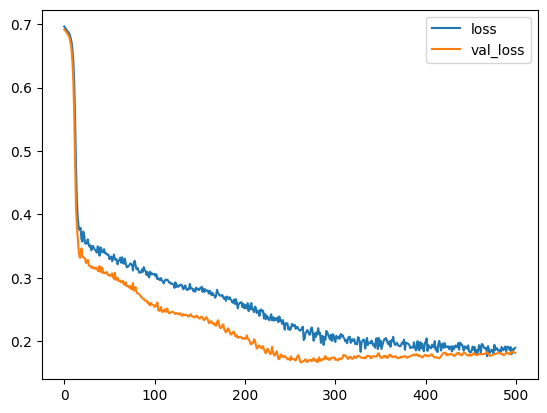

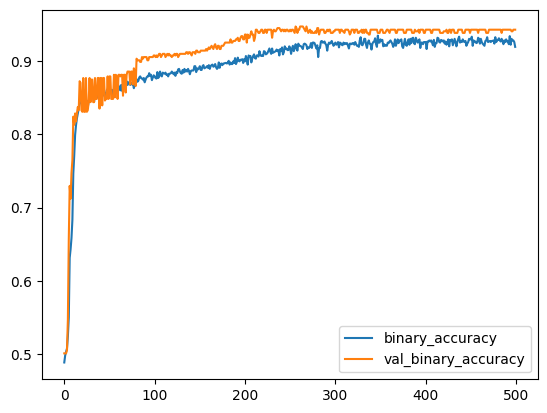

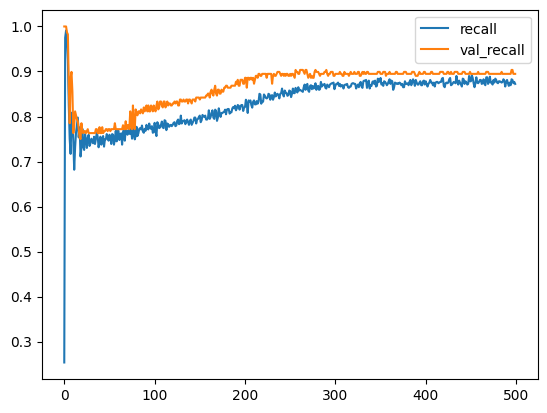

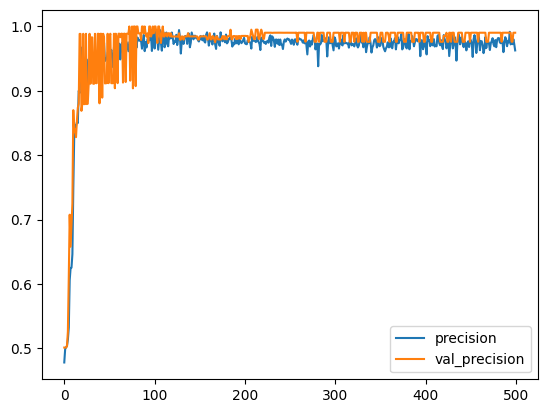

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()
history_df.loc[0:, ['recall', 'val_recall']].plot()
history_df.loc[0:, ['precision', 'val_precision']].plot()

print(f"Best Validation Loss: {history_df['val_loss'].min()}" +\
      f"\nBest Validation Accuracy: {history_df['val_binary_accuracy'].max()}"+\
      f"\nBest Recall: {history_df['val_recall'].max()}" +\
      f"\nBest Precision: {history_df['val_precision'].max()}"
)

In [ ]:
from sklearn.metrics import confusion_matrix

predicted = model.predict(X_valid)

print(confusion_matrix(y_valid,predicted.round()))


15/15 [==============================] - 0s 5ms/step
[[225   2]
 [ 24 204]]


In [ ]:
tp=255
fp=2
fn=24
tn=204
acc=(tp+tn)/(tp+tn+fp+fn)
prec=tp/(tp+fp)
rec=tp/(tp+fn)
f1= 2*(prec*rec/(prec+rec))
print(f"ACCURACY= {acc*100}")
print(f"PRECISION= {prec*100}")
print(f"RECALL= {rec*100}")
print(f"f1= {f1*100}")

ACCURACY= 94.63917525773195
PRECISION= 99.22178988326849
RECALL= 91.39784946236558
f1= 95.14925373134328
